<a href="https://colab.research.google.com/github/AnalyticsLover/Google-Analytics-Bellabeat-CaseStudy/blob/main/GoogleAnalytics_Bellabeat_CaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

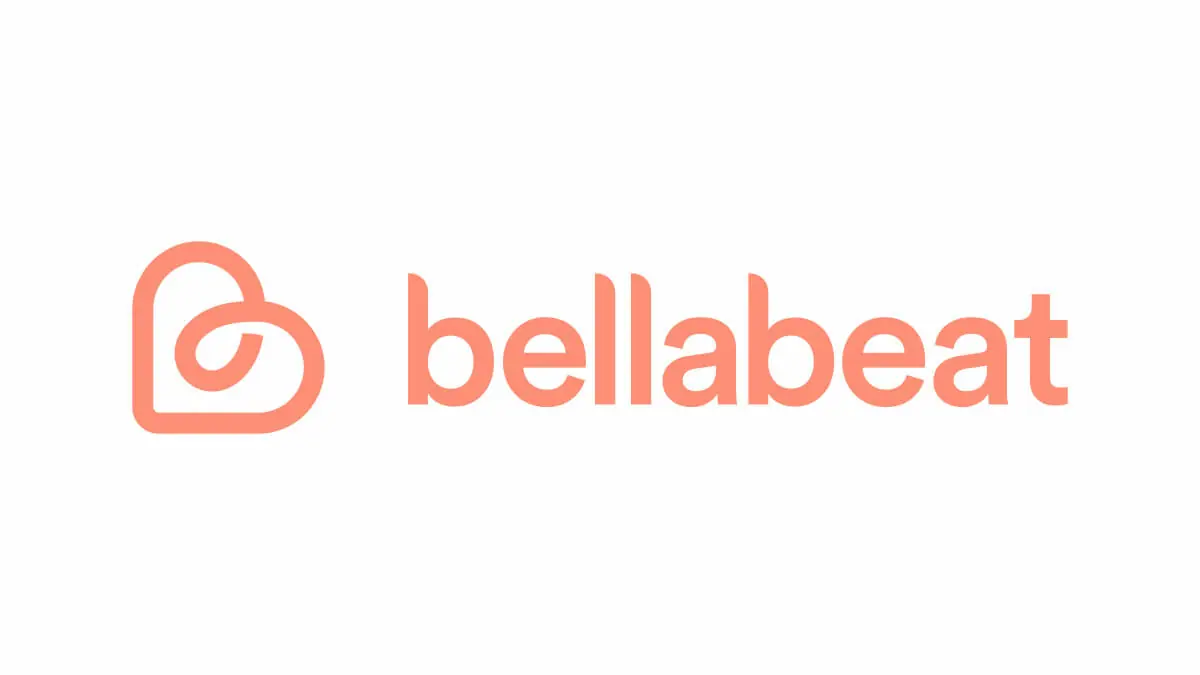

#  <font color='FE8F77'><u>Google Analytics Certificate Capstone Project<a class="anchor" id="ask-phase"></a></font></u>




# **Bellabeat CaseStudy** - How can a wellness technology company play it smart?
## Using Python, SQLite, Tableau & R
*Created by Lucia Pardini*

### <font color='FE8F77'><u>Ask<a class="anchor" id="scenario"></a></font></u>


---
 **Business Task**

Cofounder and Chief Creative Officer Urška Sršen wants to analyze smart device fitness data for insight into new growth opportunities for the company and asks to focus on one of Bellabeat's products and analyze smart device data to gain insight for how consumers are using their smart devices.

* What are some trends in smart device usage?
* How could these trends apply to Bellabeat customers?
* How could these trends help influence Bellabeat marketing strategy?



In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# loading the extention
%load_ext sql

# Conecting to the database
%sql sqlite:///08_27_2024_Bellabeat_Capstone_Project.db

In [ ]:
#establishing necessary conections
conn = sqlite3.connect("08_27_2024_Bellabeat_Capstone_Project.db")

### <font color='FE8F77'><u>Prepare<a class="anchor" id="scenario"></a></font></u>

---



*   **Data used for analysis**: FitBit Fitness Tracker Dataset

*   **Source of data**: Kaggle

*   **Description**: The dataset **was generated by respondents** to a distributed **survey** via Amazon Mechanical Turk **between 03.12.2016 and 05.12.2016**, a lapse of aproximately **62 days**. Thirty eligible Fitbit users consented to the submission **of personal tracker data**, including minute-level output for physical activity, heart rate, and sleep monitoring.

*   **Considerations**: With a **small sample size of only thirthy with 2 months worth of data**, the scope of data is fairly limited and might not be an accurate representation of the target population. Variation between output represents use of different types of Fitbit trackers and individual tracking behaviors / preferences.
Not all users have data across the dataset so the data is further limited.
*  **Limitations**: The data is missing user individualization, gender and age of data subjects are unknown. The data provides only health and wellness information, it does not tell us how the users interacted with their device.
Only FitBit users were included in the study.
* **Selected datasets**:
To understand subjects overall usage of smart devices, 3 datasets were used for analysis.

1.  dailyActivity_merged

2.  hourlySteps_merged

3.  sleepDay_merged

In [ ]:
# converting the csv files to dataframes and parsing to sql table
daily_activity_c1 = pd.read_csv("/content/DailyActivity_Merged_Cleaned_1.4.csv")
daily_activity_c1.to_sql("daily_activity_c1", conn)

416

In [ ]:
daily_activity_c2 = pd.read_csv("/content/dailyActivity_merged.csv")
daily_activity_c2.to_sql("daily_activity_c2", conn)

940

In [ ]:
hourly_steps_c_1 = pd.read_csv("/content/Cleaned_HourlySteps_1.csv")
hourly_steps_c2 = pd.read_csv("/content/Hourly_Steps_2.csv")

In [ ]:
hourly_steps_c_1.to_sql("cleaned_hourly_steps_1", conn)
hourly_steps_c2.to_sql("cleaned_hourly_steps_2", conn)

22099

In [ ]:
sleep_day = pd.read_csv("/content/Sleep_Day_Cleaned.csv")
sleep_day.to_sql("sleep_day", conn)

413

### <font color='FE8F77'><u>Process<a class="anchor" id="scenario"></a></font></u>


---
**Microsoft Excel**

Dataset was initially examined using Microsoft Excel. The use of Microsoft Excel for the analysis was needed as this tool allows to perform some data cleaning processes much simpler than in other tools and allows for a brief overview to understand the data.
The following processing tasks were performed:

* **Removed duplicates**

* **Checked for whitespaces and typos**

* **Performed columns formatting**

* **Checked for null/missing values and incorrect data**

* **Deleted records/fields that were irrelevant for analysis or with incomplete data:** users "2891001357" and "6391747486" had inconsistent data and were deleted from all files

* **Standardized datetime format across selected tables**

* **Further sorted and filtered data to ensure consistency in values and have relevance to the business question**

The resulting CSV files were uploaded to SQLite for further processes.

In [ ]:
# merging similar datasets to create a table containing the data from both months
%%sql
CREATE TABLE daily_activity AS
SELECT DISTINCT
  Id,
  ActivityDate,
  TotalSteps,
  TotalDistance,
  TrackerDistance,
  Calories,
  SedentaryMinutes,
  VeryActiveMinutes,
  FairlyActiveMinutes,
  LightlyActiveMinutes,
  LightActiveDistance,
  VeryActiveDistance,
  ModeratelyActiveDistance,
  SedentaryActiveDistance
FROM
  daily_activity_c1
UNION ALL
SELECT DISTINCT
  Id,
  ActivityDate,
  TotalSteps,
  TotalDistance,
  TrackerDistance,
  Calories,
  SedentaryMinutes,
  VeryActiveMinutes,
  FairlyActiveMinutes,
  LightlyActiveMinutes,
  LightActiveDistance,
  VeryActiveDistance,
  ModeratelyActiveDistance,
  SedentaryActiveDistance
FROM
  daily_activity_c2;

 * sqlite:///08_27_2024_Bellabeat_Capstone_Project.db
Done.


[]

In [ ]:
# Passing the final tables to dataframes.
daily_activity_df = pd.read_sql_query("SELECT * FROM daily_activity", conn)

In [ ]:
daily_activity_df.to_csv("daily_activity.csv", index=False)

In [ ]:
# merging similar datasets to create a table containing the data from both months
%%sql

CREATE TABLE clean_hourly_steps AS
SELECT
  Id,
  ActivityHour,
  StepTotal
FROM
  cleaned_hourly_steps_1
UNION ALL
SELECT
  Id,
  ActivityHour,
  StepTotal
FROM
  cleaned_hourly_steps_2;

 * sqlite:///08_27_2024_Bellabeat_Capstone_Project.db
Done.


[]

In [ ]:
hourly_steps_df = pd.read_sql_query("SELECT * FROM clean_hourly_steps", conn)

In [ ]:
hourly_steps_df.to_csv("hourly_steps.csv", index=False)

*Data validation*

---


*  Checked data consistency in DailyActivity, HourlySteps and SleepDay tables.
*  Calculated number of users per dataset and how many data is available for every  user.
*  Filtered by lowest and highest users data points to examine.



```
# Viewing entries per user in the daily_activity table.
```



In [ ]:
%%sql
SELECT
  Id,
  COUNT(*) AS entries
FROM
  daily_activity
GROUP BY
  Id
ORDER BY entries DESC;

 * sqlite:///08_27_2024_Bellabeat_Capstone_Project.db
Done.


Id,entries
4020332650,62
1624580081,49
1503960366,49
4702921684,45
4445114986,45
6962181067,44
4319703577,43
8877689391,42
8378563200,42
7086361926,42


The entries data shows that more than **33%** (12/33) **of the subjects used the fitness tracking device for 42 days** out of the two months.
- There is a total of 33 users.
- Only 1 user has complete tracking data.
- 11 users missed 20 days worth of data.
- Seven users have a 70% or more of completed data (43 days worth of data or more).
- Two users missed a maximum of 32 days worth of data, half of the evaluated time.



In [ ]:
%%sql
SELECT
AVG(entries) as average_entries
FROM (SELECT
  Id,
  COUNT(*) AS entries
FROM
  daily_activity
GROUP BY
  Id);

 * sqlite:///08_27_2024_Bellabeat_Capstone_Project.db
Done.


average_entries
41.09090909090909


**On average users have 41 entries, missing 21 days worth of tracking data**.

```
# Viewing entries per user in the hourly_steps table.
```

In [ ]:
#Check for hourly data count
%%sql
SELECT
Id,
COUNT(Id) AS entries
FROM
clean_hourly_steps
GROUP BY
Id
ORDER BY entries DESC;

 * sqlite:///08_27_2024_Bellabeat_Capstone_Project.db
Done.


Id,entries
4558609924,1480
2026352035,1480
2022484408,1480
1927972279,1480
1624580081,1480
8877689391,1479
8378563200,1479
8053475328,1479
4445114986,1479
2320127002,1479











  The query results display the following:
-   There is a total of 33 users
*  **17 users** have a **complete hourly tracking data** (1464-1480 hours).
-   **14 users** had a **hourly log count between 1150 and 1460 hours.**
*  Only **2 users had low data completion.**





In [ ]:
%%sql
SELECT
  ROUND(AVG(entries), 2) AS avg_entries
FROM (SELECT
Id,
COUNT(Id) AS entries
FROM
clean_hourly_steps
GROUP BY
Id
ORDER BY entries DESC);

 * sqlite:///08_27_2024_Bellabeat_Capstone_Project.db
Done.


avg_entries
1373.36


On average, the **users colected 1373 fitness tracking hours worth of data**, a 93% of the overall data colecting time.



```
# Checking on user count and entries in the sleep_day table.
```



In [ ]:
%%sql
SELECT
  Id,
  COUNT(*) AS entries
FROM
  sleep_day
GROUP BY
Id
ORDER BY entries DESC;

 * sqlite:///08_27_2024_Bellabeat_Capstone_Project.db
Done.


Id,entries
8378563200,32
6962181067,31
5553957443,31
4702921684,28
4445114986,28
3977333714,28
2026352035,28
5577150313,26
4319703577,26
1503960366,25


The sleep_day table contains information from 4/12/2016 to 5/12/2016, 32 days and it has data from **24 different users**.
- **15 users have +15 entries**, these users tracked their sleep at least half of the estimated time.
- Only 1 user has complete sleep data.
- **9 users have less than 10** days worth of sleep data.





In [ ]:
%%sql
SELECT
  AVG(entries) AS avg_entries
FROM (SELECT
  Id,
  COUNT(*) AS entries
FROM
  sleep_day
GROUP BY
Id
);

 * sqlite:///08_27_2024_Bellabeat_Capstone_Project.db
Done.


avg_entries
17.208333333333332


On average, the **users colected 17 days worth of sleep tracking data**

### <font color='FE8F77'><u>Analyze<a class="anchor" id="scenario"></a></font></u>


---



*   Explored in more detail to enconver trends and patterns.
*   Examined relationships between variables.
-   Sarched for strong correlations in variables.
-   Extracted insights that will help solve the business task.







```
# Overview of daily_activity statistical data.
```



In [ ]:
daily_activity_df.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,Calories,SedentaryMinutes,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,LightActiveDistance,VeryActiveDistance,ModeratelyActiveDistance,SedentaryActiveDistance
count,1.356000e+03,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000
mean,4.782802e+09,7456.426991,5.344646,5.327227,2298.467552,999.036136,20.086283,13.283186,189.230826,3.269565,1.429366,0.552861,0.001755
std,2.388428e+09,5174.896192,3.975331,3.954903,723.434651,301.360964,31.935092,20.121866,110.562082,2.088014,2.634555,0.875900,0.007846
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3416.250000,2.347500,2.347500,1819.000000,733.000000,0.000000,0.000000,120.750000,1.787500,0.000000,0.000000,0.000000
50%,4.445115e+09,7192.500000,5.090000,5.090000,2132.500000,1060.000000,3.000000,6.000000,196.000000,3.315000,0.135000,0.210000,0.000000
75%,6.962181e+09,10688.500000,7.622500,7.597500,2783.000000,1240.250000,30.000000,19.000000,263.000000,4.720000,1.930000,0.790000,0.000000
max,8.877689e+09,36019.000000,28.030001,28.030001,4900.000000,1440.000000,210.000000,143.000000,586.000000,12.510000,21.920000,6.480000,0.110000




```
# Viewing  avg LightlyActiveMinutes, avg FairlyActiveMinues, avg VeryActiveMinutes and avg SedentaryMinutes trends on days of the week
Then plotting
```



In [ ]:
%%sql
SELECT
    sd.DayOfWeek AS week_day,
    ROUND(AVG(da.SedentaryMinutes)) AS avg_sed_mins,
    ROUND(AVG(da.LightlyActiveMinutes), 2) AS avg_light_mins,
    ROUND(AVG(da.FairlyActiveMinutes)) as avg_fair_mins,
    ROUND(AVG(da.VeryActiveMinutes)) as avg_very_mins
FROM
     daily_activity da
JOIN
    sleep_day sd
ON
    sd.Id = da.Id AND sd.SleepDay = da.ActivityDate
GROUP BY
    sd.DayOfWeek
ORDER BY
  week_day;

 * sqlite:///08_27_2024_Bellabeat_Capstone_Project.db
Done.


week_day,avg_sed_mins,avg_light_mins,avg_fair_mins,avg_very_mins
Friday,743.0,222.68,15.0,21.0
Monday,718.0,220.64,19.0,33.0
Saturday,679.0,250.09,23.0,27.0
Sunday,688.0,200.04,17.0,22.0
Thursday,701.0,202.88,16.0,23.0
Tuesday,740.0,216.58,20.0,31.0
Wednesday,714.0,207.97,17.0,21.0


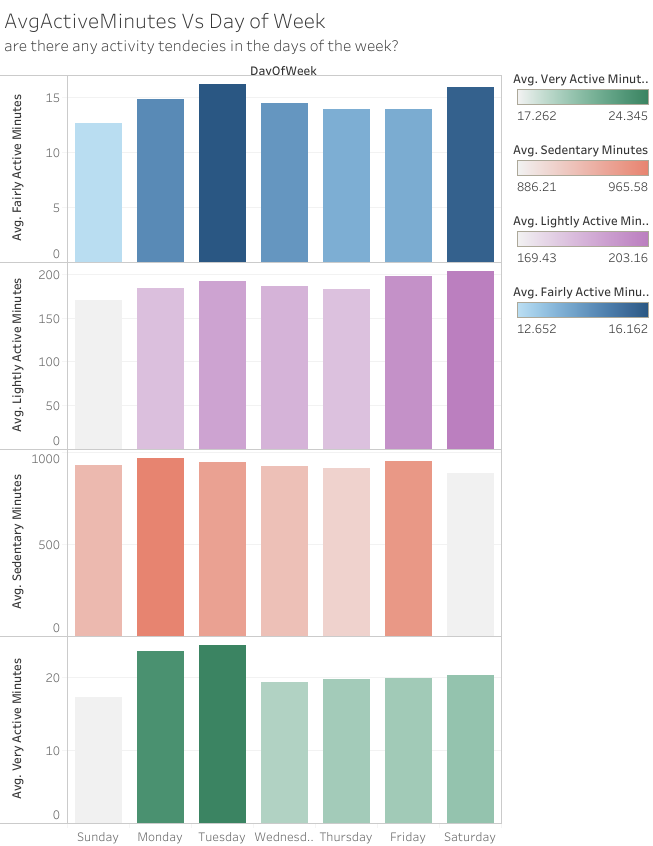



```
# Viewing the relationship between TotalActiveDistance and
 LightActiveDistance, ModerateActiveDistance, SedentaryActiveDistance and VeryActiveDistance
 Then plotting
```



In [ ]:
%%sql
SELECT
    ROUND(SUM(da.SedentaryActiveDistance), 2) AS sed_dis,
    ROUND(SUM(da.LightActiveDistance), 2) AS light_dis,
    ROUND(SUM(da.ModeratelyActiveDistance), 2) AS mod_dis,
    ROUND(SUM(da.VeryActiveDistance), 2) AS very_dis,
    SUM(da.TotalDistance) AS total_dis
FROM
    daily_activity da
ORDER BY
    sed_dis DESC,
    light_dis DESC,
    mod_dis DESC,
    very_dis DESC;

 * sqlite:///08_27_2024_Bellabeat_Capstone_Project.db
Done.


sed_dis,light_dis,mod_dis,very_dis,total_dis
2.38,4433.53,749.68,1938.22,7247.33999271149


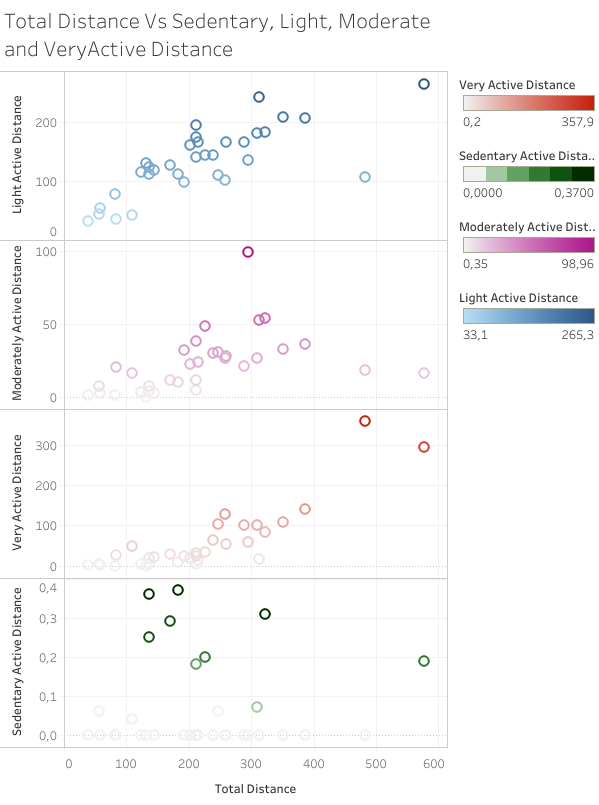

```
# Seeing if users exceed the recommended 10,000 daily steps target
```
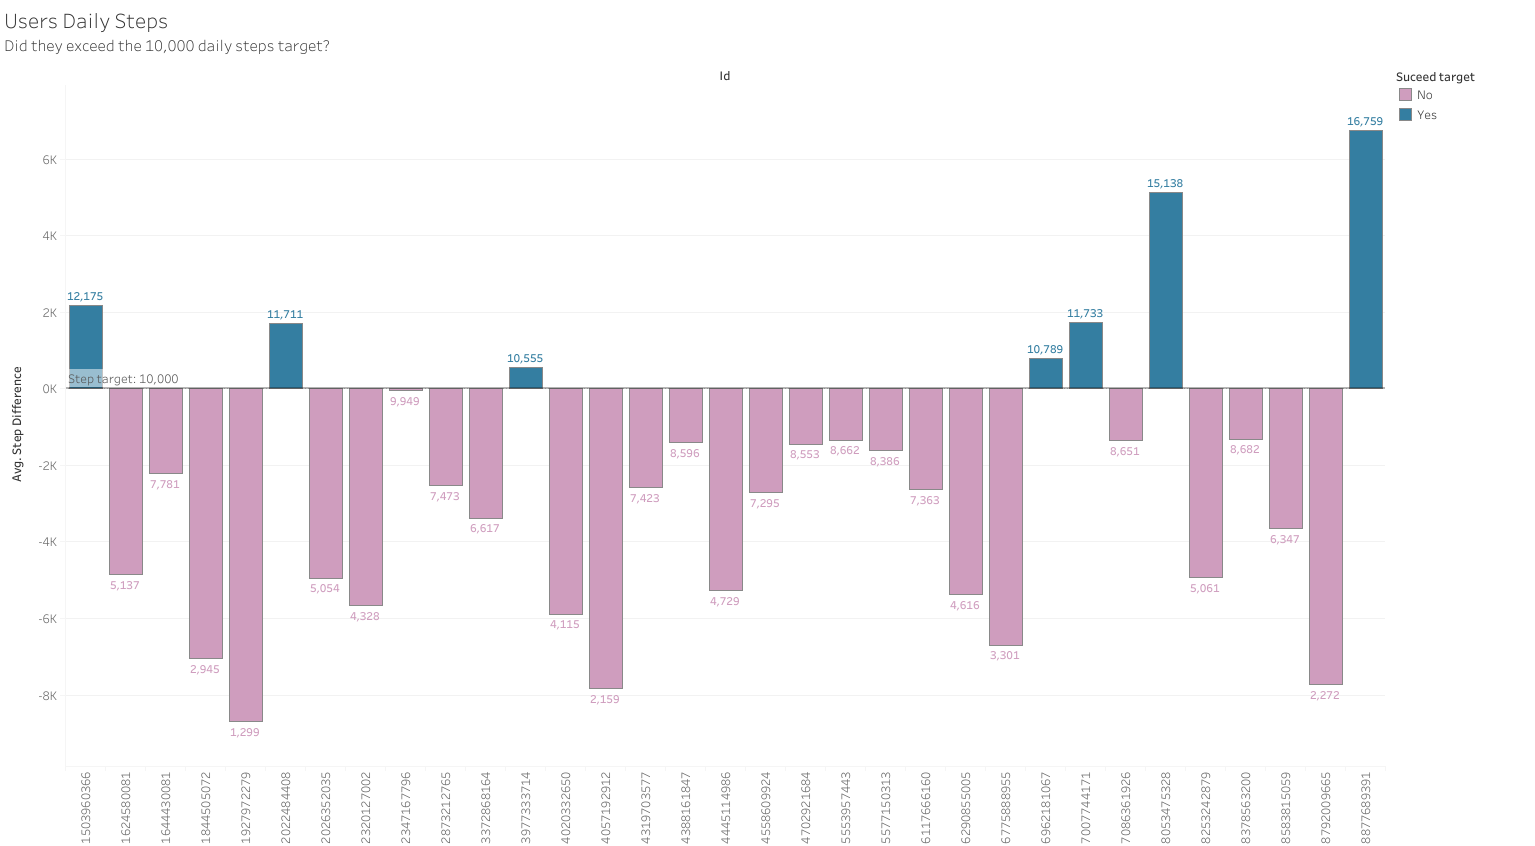



```
# Plotting to see correlation between Total Steps, Calories and TotalDistance
```



*R code:*
```

library(ggplot2)
ggplot(data = daily_activity, aes(x = Calories, y = TotalSteps)) +
  geom_point(aes(color = TotalDistance), alpha = 0.8) +  
  geom_smooth(method = "lm", formula = y ~ x, color = "lightblue", se = FALSE) +
  labs(title = "Total Steps vs. Calories Burned",
       x = "Calories Burned",
       y = "Total Steps") +
  scale_color_gradient(low = "lightpink", high = "deeppink") +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 16, family = "serif"),
    axis.title = element_text(size = 14, family = "serif"),
    axis.text = element_text(size = 14, family = "serif")
```



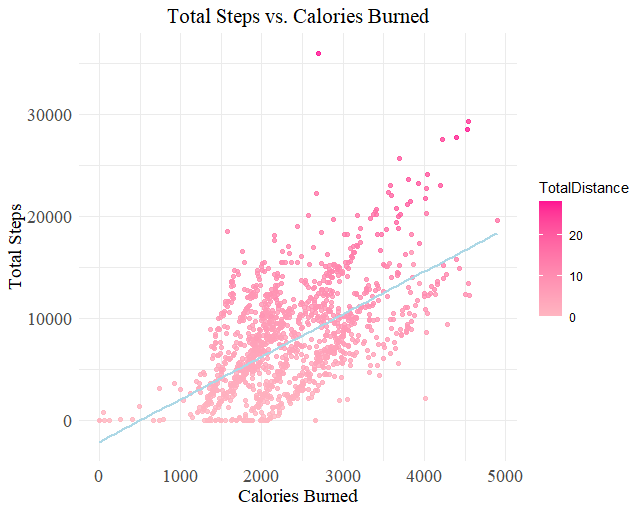

```
# Overview of sleep_day statistical data.
```

In [ ]:
sleep_day.describe()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.130000e+02,413.000000,413.000000,413.000000
mean,5.000979e+09,1.118644,419.467312,458.639225
std,2.060360e+09,0.345521,118.344679,127.101607
min,1.503960e+09,1.000000,58.000000,61.000000
25%,3.977334e+09,1.000000,361.000000,403.000000
50%,4.702922e+09,1.000000,433.000000,463.000000
75%,6.962181e+09,1.000000,490.000000,526.000000
max,8.792010e+09,3.000000,796.000000,961.000000


In [ ]:
%%sql
SELECT
    sd.DayOfWeek AS week_day,
    ROUND(AVG(sd.TotalMinutesAsleep), 2) AS avg_sleep_minutes,
    ROUND(AVG(sd.TotalTimeInBed), 2) AS avg_time_in_bed,
    ROUND(AVG(sd.TotalTimeInBed - sd.TotalMinutesAsleep), 2) AS diff_time
FROM
    sleep_day sd
JOIN
    daily_activity da
ON
    sd.Id = da.Id AND sd.SleepDay = da.ActivityDate
GROUP BY
    sd.DayOfWeek
ORDER BY
  diff_time DESC;

 * sqlite:///08_27_2024_Bellabeat_Capstone_Project.db
Done.


week_day,avg_sleep_minutes,avg_time_in_bed,diff_time
Sunday,452.75,503.51,50.76
Saturday,420.81,461.28,40.47
Friday,405.42,445.05,39.63
Tuesday,404.54,443.29,38.75
Monday,418.83,456.17,37.34
Wednesday,434.68,470.03,35.35
Thursday,402.37,435.8,33.43


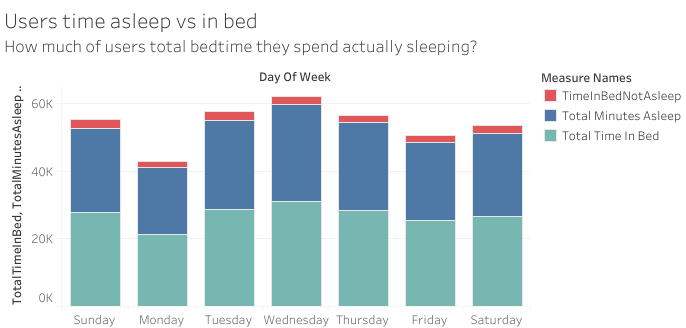



```
# Seeing if users exceed the target of 420 minutes (7hour) sleep
```



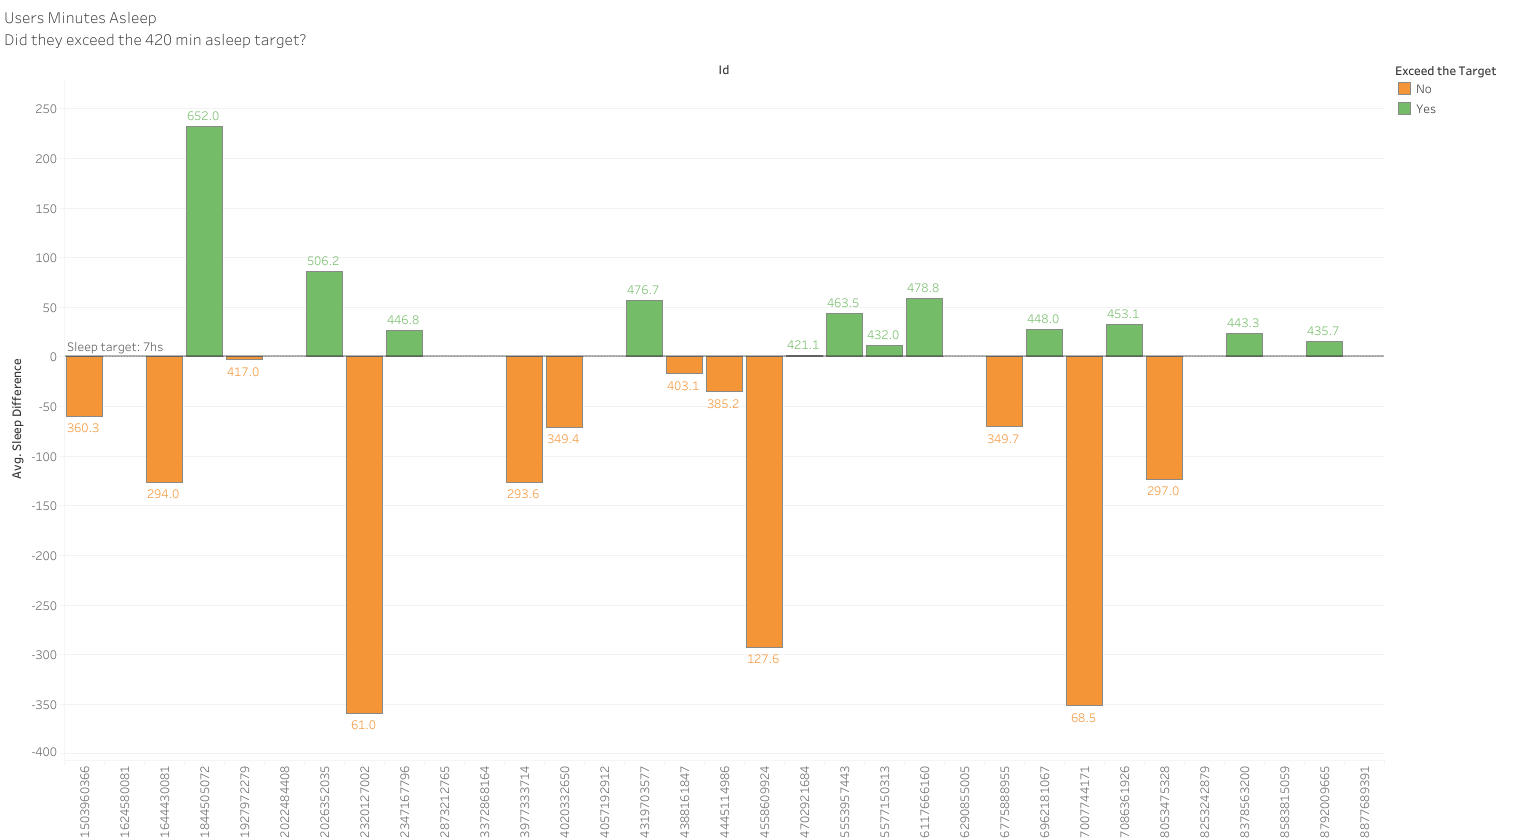

```
# Overview of hourly_steps statistical data.
```

In [ ]:
hourly_steps_df.describe()

,Id,StepTotal
count,4.532100e+04,45321.000000
mean,4.847799e+09,307.189162
std,2.432094e+09,681.172218
min,1.503960e+09,0.000000
25%,2.320127e+09,0.000000
50%,4.445115e+09,25.000000
75%,6.962181e+09,330.000000
max,8.877689e+09,10565.000000


*R code:*

```
# formating ActivityHour as date type
hourly_steps$ActivityHour <- as.POSIXct(hourly_steps$ActivityHour, format = "%m/%d/%Y %H:%M")

#getting only the hour
hourly_steps$Hour <- as.numeric(format(hourly_steps$ActivityHour, "%H"))

# grouping by hour and getting the avg
hourly_summary <- hourly_steps %>%
  group_by(Hour) %>%
  summarize(AverageSteps = mean(StepTotal, na.rm = TRUE))

# identifying highest and lowest points
max_point <- hourly_summary %>% filter(AverageSteps == max(AverageSteps))
min_point <- hourly_summary %>% filter(AverageSteps == min(AverageSteps))

# creating the plot
ggplot(hourly_summary, aes(x = Hour, y = AverageSteps)) +
  geom_line(color = "lightblue", size=1.5) +
  geom_point(data=max_point, aes(x=Hour, y=AverageSteps), color="purple", size= 3) +
  geom_point(data=min_point, aes(x=Hour, y=AverageSteps), color="orange", size= 3) +
  geom_text(data = max_point, aes(x = Hour, y = AverageSteps, label = round(AverageSteps, 1)), vjust = -1, color = "purple") +
  geom_text(data = min_point, aes(x = Hour, y = AverageSteps, label = round(AverageSteps, 1)), vjust = -1, color = "orange") +
  labs(x = "Hour of Day", y = "Average Steps", title = "Average Steps by Hour of Day") +
  theme_minimal()
```
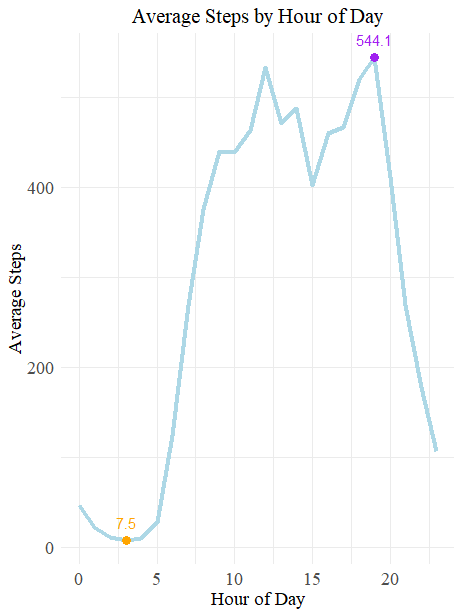




```
# seeing correlations in daily_activity variables
```



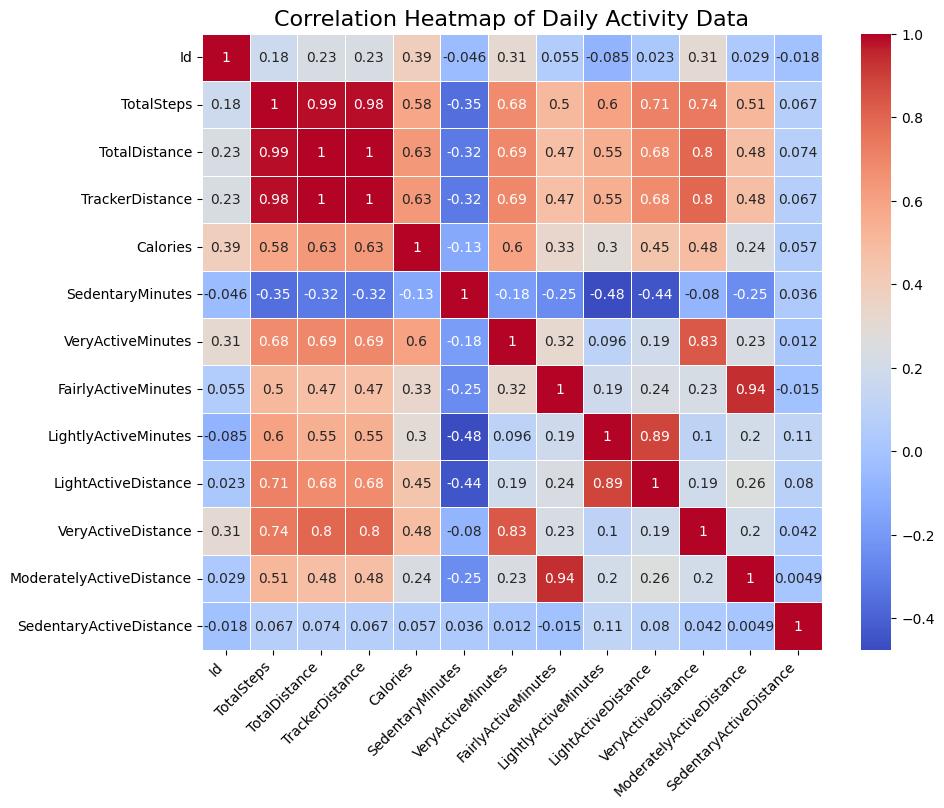

In [ ]:
daily_activity_df2 = daily_activity_df.drop(columns=['ActivityDate'])
corr = daily_activity_df2.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Daily Activity Data', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()




```
# seeing correlation in sleep_day variables
```



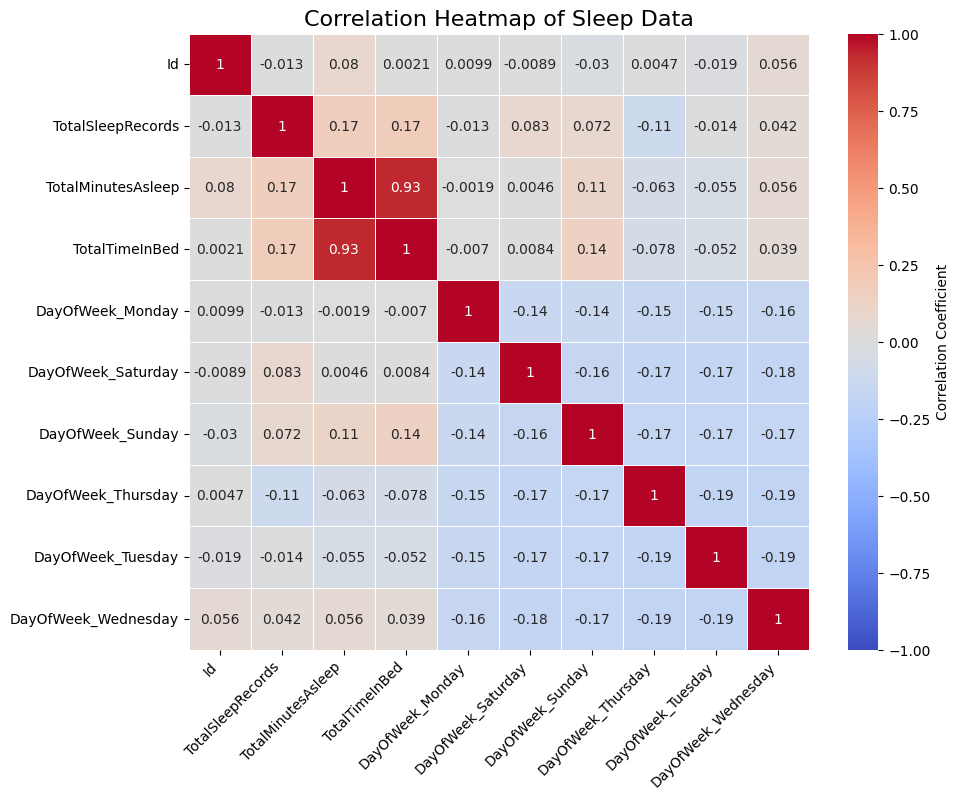

In [ ]:
sleep_day_df2 = sleep_day.drop(columns=['SleepDay'])
sleep_day_df2 = pd.get_dummies(sleep_day_df2, columns=["DayOfWeek"], drop_first="True")
corr2 = sleep_day_df2.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr2, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap of Sleep Data', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

### <font color='FE8F77'><u>Share<a class="anchor" id="scenario"></a></font></u>


---


*   Used Tableau to create visualizations that were made with the purpose of showing the findings, trends and patterns discovered in the analysis.
*   Created a dashboard including all visualizations and uploaded it to Tableau Public, to see [click here.](https://public.tableau.com/app/profile/lucia.pardini/viz/Bellabeat_CaseStudy_17255811286620/Viz10)
*   Used R to create more specific and detailed statistical visualizations to help drawn more accurate conclusions.
*   Uploaded the R Script to Github page, [click and see](https://github.com/AnalyticsLover)












## <font color='FE8F77'><u>Act<a class="anchor" id="scenario"></a></font></u>


---

 <font color='FE8F79'>What are some trends in smart device usage?<a class="anchor" id="recommendations"></a></font>

A significant portion of the **participants used the smart device for approximately 66% of the estimated two-month period**. Although the daily use of the fitness tracking device remained fairly consistent, **there was a noticeable reduction in usage during nighttime sleep tracking.**

There is a high variation between the collected activity data and the sleep data, with **only 24 out of 33 participants tracking their sleep**. Additionally, **7% of the data was either missing or inactive**, which indicates a decline in device usage over time.

User **interaction with the product was not as consistent as needed to perform a comprehensive analysis** that could lead to reliable conclusions for decision-making. While the underlying reasons for the decline in usage are not explicitly clear from the data, possible explanations include discomfort while wearing the device or issues with the battery life, limiting continuous data collection.


Main extracted insights:

- **85%** of participants** tracked their activities for only 50% of the study period.**

- The majority of participants **tended to remain sedentary** or engaged in light activities.

- Most users av**eraged 2,000 steps per day**, far below the recommended target.

- Participants were more likely to engage in physical activities over the weekend, possibly due to work schedules during weekdays.

- **Few participants met the recommended targets of 10,000 daily steps or 7 hours of sleep.**

- Users were **most active** in the afternoons, specifically **between 3 PM and 8 PM.**

- Sedentary patterns were more pronounced on Mondays, Fridays, and Sundays, with increased light-to-moderate activity on Saturdays.

- Tuesdays showed the highest probability of being the most active day of the week.

- **Participants spent nearly the same amount of time in bed as asleep**.

- Saturdays, Sundays, and Wednesdays were the days when users spent the most time in bed.

- Participants **tended to sleep less on Mondays.**


<font color='FE8F79'>How could these trends apply to Bellabeat customers?<a class="anchor" id="recommendations"></a></font>

 The trends observed provide valuable insights into how Bellabeat customers might behave with their devices. Understanding these patterns can help Bellabeat optimize their products and user experience by catering to users' activity preferences and schedules.

 These insights can offer valuable direction for Bellabeat to better understand user behavior and tailor its product offerings accordingly:

- **User activity fluctuates throughout the week**, with less engagement during weekdays. By recognizing this, Bellabeat can develop strategies to encourage users to maintain consistent activity levels on weekdays.

- **Sleep tracking is underutilized**, with a significant number of participants not tracking sleep consistently. Bellabeat can optimize this feature by promoting its benefits to users and providing better sleep-tracking tools.

- The** data indicates a lower-than-expected activity rates and a sedentary behavior**. Bellabeat can create targeted initiatives to promote physical activity, especially during low-activity times (e.g., work hours).

<font color='FE8F79'>How could these trends help influence Bellabeat marketing strategy?<a class="anchor" id="recommendations"></a></font>


**Recommendations for Bellabeat’s Marketing Strategy**

Based on the trends and user behavior identified, here are key recommendations for Bellabeat’s marketing approach:

- **Redesign the Leaf Device:** Improve the device’s wearability, especially for sleep tracking, to increase user comfort and engagement.

- **Customize Notifications:** Introduce personalized, motivational notifications that encourage users to be more active during traditionally sedentary periods, such as weekday afternoons.

- **Extend Battery Life:** Enhancing battery life will likely result in more frequent device use, as the need for charging is a common barrier to continued engagement.

- **Collect Additional User Data:** Incorporate health indicators, lifestyle habits, and demographic data to provide more personalized fitness and wellness recommendations.

- **Set Personalized Activity Goals:** Customize user goals based on their activity levels and health metrics, allowing for more relevant and achievable targets that motivate continued device usage.

- **Set Real-Time Progress Alerts:** Notify users when they are making progress toward or falling behind on their goals. Additionally, remind them to use the device if it hasn’t been worn for a significant period.

- **Enhanced Sleep Features:** Strengthen the sleep-tracking functionality by offering users tailored sleep schedules and reminders to go to bed, aiming to improve their overall sleep hygiene.

- **Free Trial for Premium Features:** Offering a free trial of premium membership features can boost user engagement and maintain device usage over time.



